In [1]:
import numpy as np
import matplotlib.pyplot as plt

dati_exp = np.loadtxt("dati_ottica_gp13.txt")
dati_al =np.loadtxt(r"C:\Users\Lorenzo\Desktop\Lab4\Reflectance_Al.txt", skiprows =1)

In [3]:
x_exp= [dati_exp[i][0] for i in range(len(dati_exp))]
y_exp= [dati_exp[i][1]/100 for i in range(len(dati_exp))]
len(dati_exp)

751

In [4]:
min(x_exp)

300.0

In [36]:
x_exp

[1800.0,
 1798.0,
 1796.0,
 1794.0,
 1792.0,
 1790.0,
 1788.0,
 1786.0,
 1784.0,
 1782.0,
 1780.0,
 1778.0,
 1776.0,
 1774.0,
 1772.0,
 1770.0,
 1768.0,
 1766.0,
 1764.0,
 1762.0,
 1760.0,
 1758.0,
 1756.0,
 1754.0,
 1752.0,
 1750.0,
 1748.0,
 1746.0,
 1744.0,
 1742.0,
 1740.0,
 1738.0,
 1736.0,
 1734.0,
 1732.0,
 1730.0,
 1728.0,
 1726.0,
 1724.0,
 1722.0,
 1720.0,
 1718.0,
 1716.0,
 1714.0,
 1712.0,
 1710.0,
 1708.0,
 1706.0,
 1704.0,
 1702.0,
 1700.0,
 1698.0,
 1696.0,
 1694.0,
 1692.0,
 1690.0,
 1688.0,
 1686.0,
 1684.0,
 1682.0,
 1680.0,
 1678.0,
 1676.0,
 1674.0,
 1672.0,
 1670.0,
 1668.0,
 1666.0,
 1664.0,
 1662.0,
 1660.0,
 1658.0,
 1656.0,
 1654.0,
 1652.0,
 1650.0,
 1648.0,
 1646.0,
 1644.0,
 1642.0,
 1640.0,
 1638.0,
 1636.0,
 1634.0,
 1632.0,
 1630.0,
 1628.0,
 1626.0,
 1624.0,
 1622.0,
 1620.0,
 1618.0,
 1616.0,
 1614.0,
 1612.0,
 1610.0,
 1608.0,
 1606.0,
 1604.0,
 1602.0,
 1600.0,
 1598.0,
 1596.0,
 1594.0,
 1592.0,
 1590.0,
 1588.0,
 1586.0,
 1584.0,
 1582.0,
 1580.0,
 

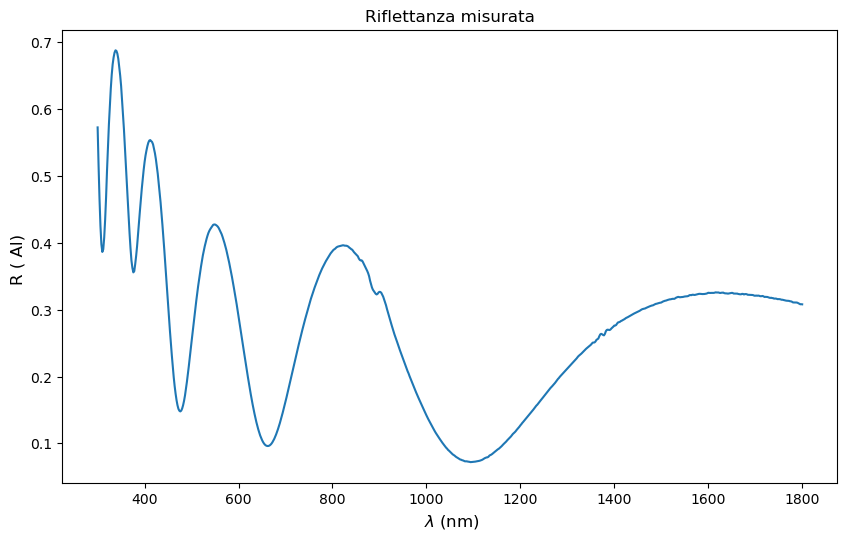

In [39]:
plt.figure(figsize= (10,6), dpi = 100)
plt.ylabel ("R ( Al) ",fontsize=12)
plt.xlabel(" $\lambda $ (nm) ",fontsize=12)
plt.title("Riflettanza misurata")
plt.plot(x_exp,y_exp)

In [40]:
x_al = [dati_al[i][0] for i in range(len(dati_al))]
y_al = [dati_al[i][1] for i in range(len(dati_al))]

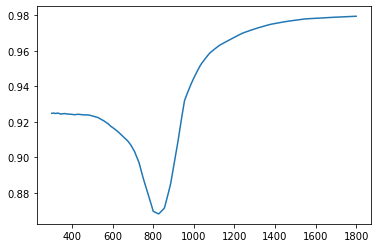

In [41]:
plt.plot(x_al, y_al)

In [42]:
print(dati_al)

[[3.000000e+02 9.247492e-01]
 [3.020000e+02 9.247520e-01]
 [3.040000e+02 9.247883e-01]
 ...
 [1.796000e+03 9.794750e-01]
 [1.798000e+03 9.794870e-01]
 [1.800000e+03 9.794990e-01]]


In [43]:
multiplied= []
for i in range(len(dati_al)):
    multiplied.append(y_exp[i]*y_al[i])

Spettro ricostruito 

$\frac{R_{assoluto} (SiO_2)}{R_{Assoluto}(Al)} = grafico$


In [10]:
max(x_exp)

1800.0

In [11]:
def find_maxima(x,y,n):
    if len(x) != len(y):
        raise BaseException ("Le liste non sono di lunghezza uguale")
    maxima = []
    local = y[0]
    max_xs = []
    for i in range(len(x)-1):
        if y[i] >local and y[i] > y[i+1]:
            maxima.append(y[i])
            max_xs.append(x[i])
            local = y[i]
        else:
            local = y[i]
            #print("bb")
    #print(maxima,max_xs)
    max_rev = {} #qui vogliamo conservare l'ascissa relativa ad ogni massimo
    for i in range(len(maxima)):
        max_rev[maxima[i]] = max_xs [i] 
    maxima.sort(reverse = True)
    if len(maxima) < n:
        raise BaseException ("Non sono stati trovati abbastanza massimi")
    max_sorted = [maxima[k] for k in range(n)]
    max_x_sorted = [max_rev [t] for t in max_sorted]
    return (max_sorted , max_x_sorted)

    

In [12]:
picchi = find_maxima(x_exp,y_exp,4)
px = picchi [0]
py = picchi[1]

In [21]:
residui = []

Partiamo dalla formula teorica. 

$ \displaystyle{ d =  \frac{1}{2} \frac{\lambda_0' \lambda_0 }{ \lambda_0 n_2' cos(\theta_I ')- \lambda_0' n_2 cos(\theta_I)} }$

Nel nostro caso $ \theta_I = 7°$

In [23]:
theta = 7*np.pi/180
c = np.cos(theta)
xs = []
d = []
for i in range(len(py)):
    for j in range(len(py)):
        if i!= j:
            xs.append(j)
            n_1, n_2= 1.5, 1.5
            apertura = (py[i]*py[j])/(2*(n_2*c*py[i]-n_1*py[j]*c))
            d.append(abs(apertura))

In [24]:
d

[631.9900371806186,
 296.21428557268206,
 192.78409081693155,
 631.990037180619,
 557.5282802764631,
 277.4043150643866,
 296.21428557268223,
 557.5282802764633,
 552.1153843514489,
 192.78409081693158,
 277.4043150643866,
 552.1153843514492]

In [25]:
media  = np.mean(d)
print(media)

418.00606554375526


In [26]:
sigma= np.std(d)
errorsy= [sigma for i in range(len(d))]

In [44]:
sigma

167.61460045727148

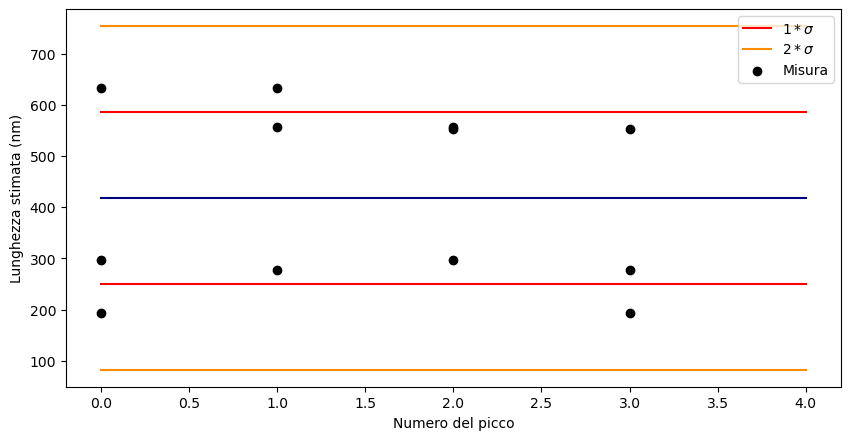

In [37]:
plt.figure(figsize = (10,5), dpi = 100)
x_model= np.linspace(0,4,100)
y_mean = [media for i in x_model]
y_sigma_up=[media+sigma for i in x_model]
y_sigma_down = [media-sigma for i in x_model]
y_2_s_up = [media+2*sigma for i in x_model]
y_2_s_down = [media-2*sigma for i in x_model]
plt.plot(x_model, y_mean, color = "navy")
plt.plot(x_model, y_sigma_up, color = "red", label = "$1* \sigma$")
plt.plot(x_model, y_sigma_down, color = "red")
plt.plot(x_model,y_2_s_up, color= "darkorange", label = "$2* \sigma$" )
plt.plot(x_model,y_2_s_down, color= "darkorange" )
plt.scatter(xs, d, marker = "o", label = "Misura", color = "black" )
#plt.errorbar(xs, d, yerr = errorsy, xerr = None, ls = "none", color = "black" )
len(d)
plt.xlabel("Numero del picco")
plt.ylabel("Lunghezza stimata (nm)")
plt.legend()

La stima quindi data dalla misura è di 418 nm, cioè dello stesso ordine di grandezza che ci aspettavamo. Le misure sono distribuite tutte entro le due $ \sigma $, e il 66,7 % delle misure si trova entro una $ \sigma $, proprio come ci si aspetta per misure distribuite gaussianamente. (Forse si può fare una stima sulla barra d'errore della misura, però non è proprio banale). la stima, quindi, è di $418 \pm 167 nm $

In [13]:
print(px)
print(py)

[0.6881378599999999, 0.55382071, 0.42750650999999995, 0.39639028000000004]
[338.0, 412.0, 548.0, 822.0]


In [14]:
theoretical = np.loadtxt(r"C:\Users\Lorenzo\Desktop\Lab4\Sio2_teorico_418.txt", skiprows = 1)

In [15]:
x_t_418 = [theoretical[i][0] for i in range(len(theoretical))]
y_t_418 = [theoretical[i][1] for i in range(len(theoretical))]

Text(0, 0.5, 'Riflettanza')

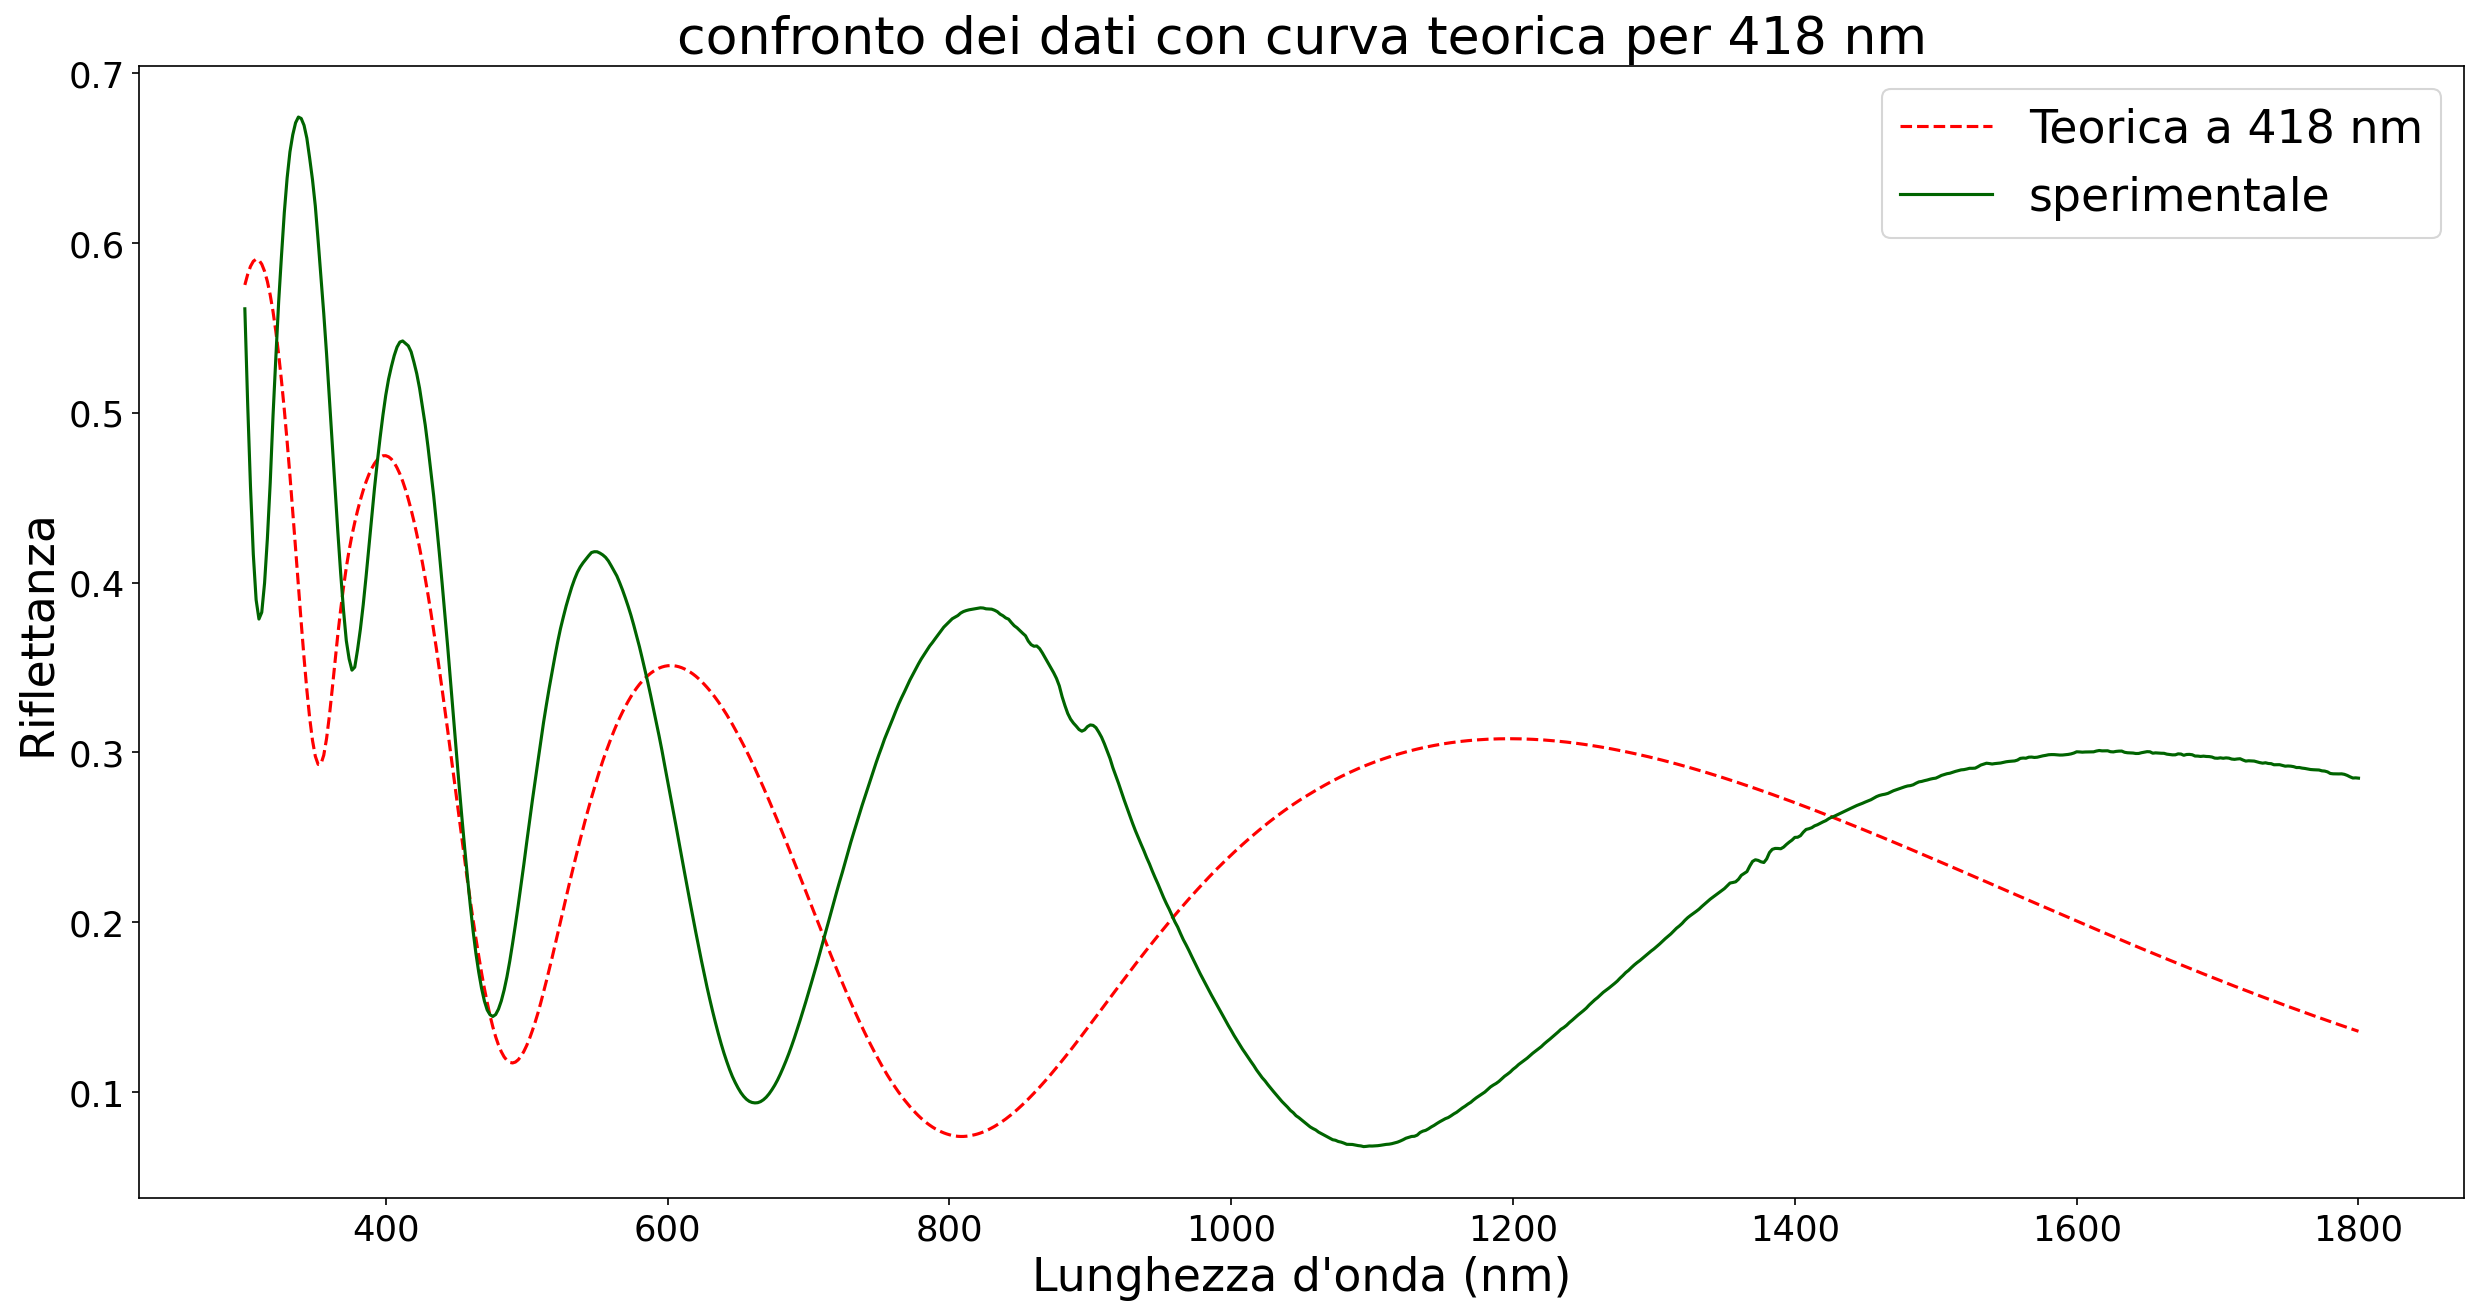

In [51]:
plt.figure(figsize = (20,10), dpi = 150)
plt.plot(x_t_418, y_t_418, label = "Teorica a 418 nm", ls = "--", color = "red")
plt.plot(x_exp,multiplied, label = "sperimentale", color = "darkgreen")
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.legend(fontsize = 22)
plt.title("Confronto dei dati con curva teorica per 418 nm", fontsize = 25)
plt.xlabel("Lunghezza d'onda (nm)",fontsize = 22)
plt.ylabel("Riflettanza", fontsize = 22)

La misura sembra quindi non essere concorde con i dati teorici. Confrontiamo quindi con spettri di differente lunghezza d'onda

In [100]:
lista_lunghezze = [418,520,550,560,570,580,610,700]


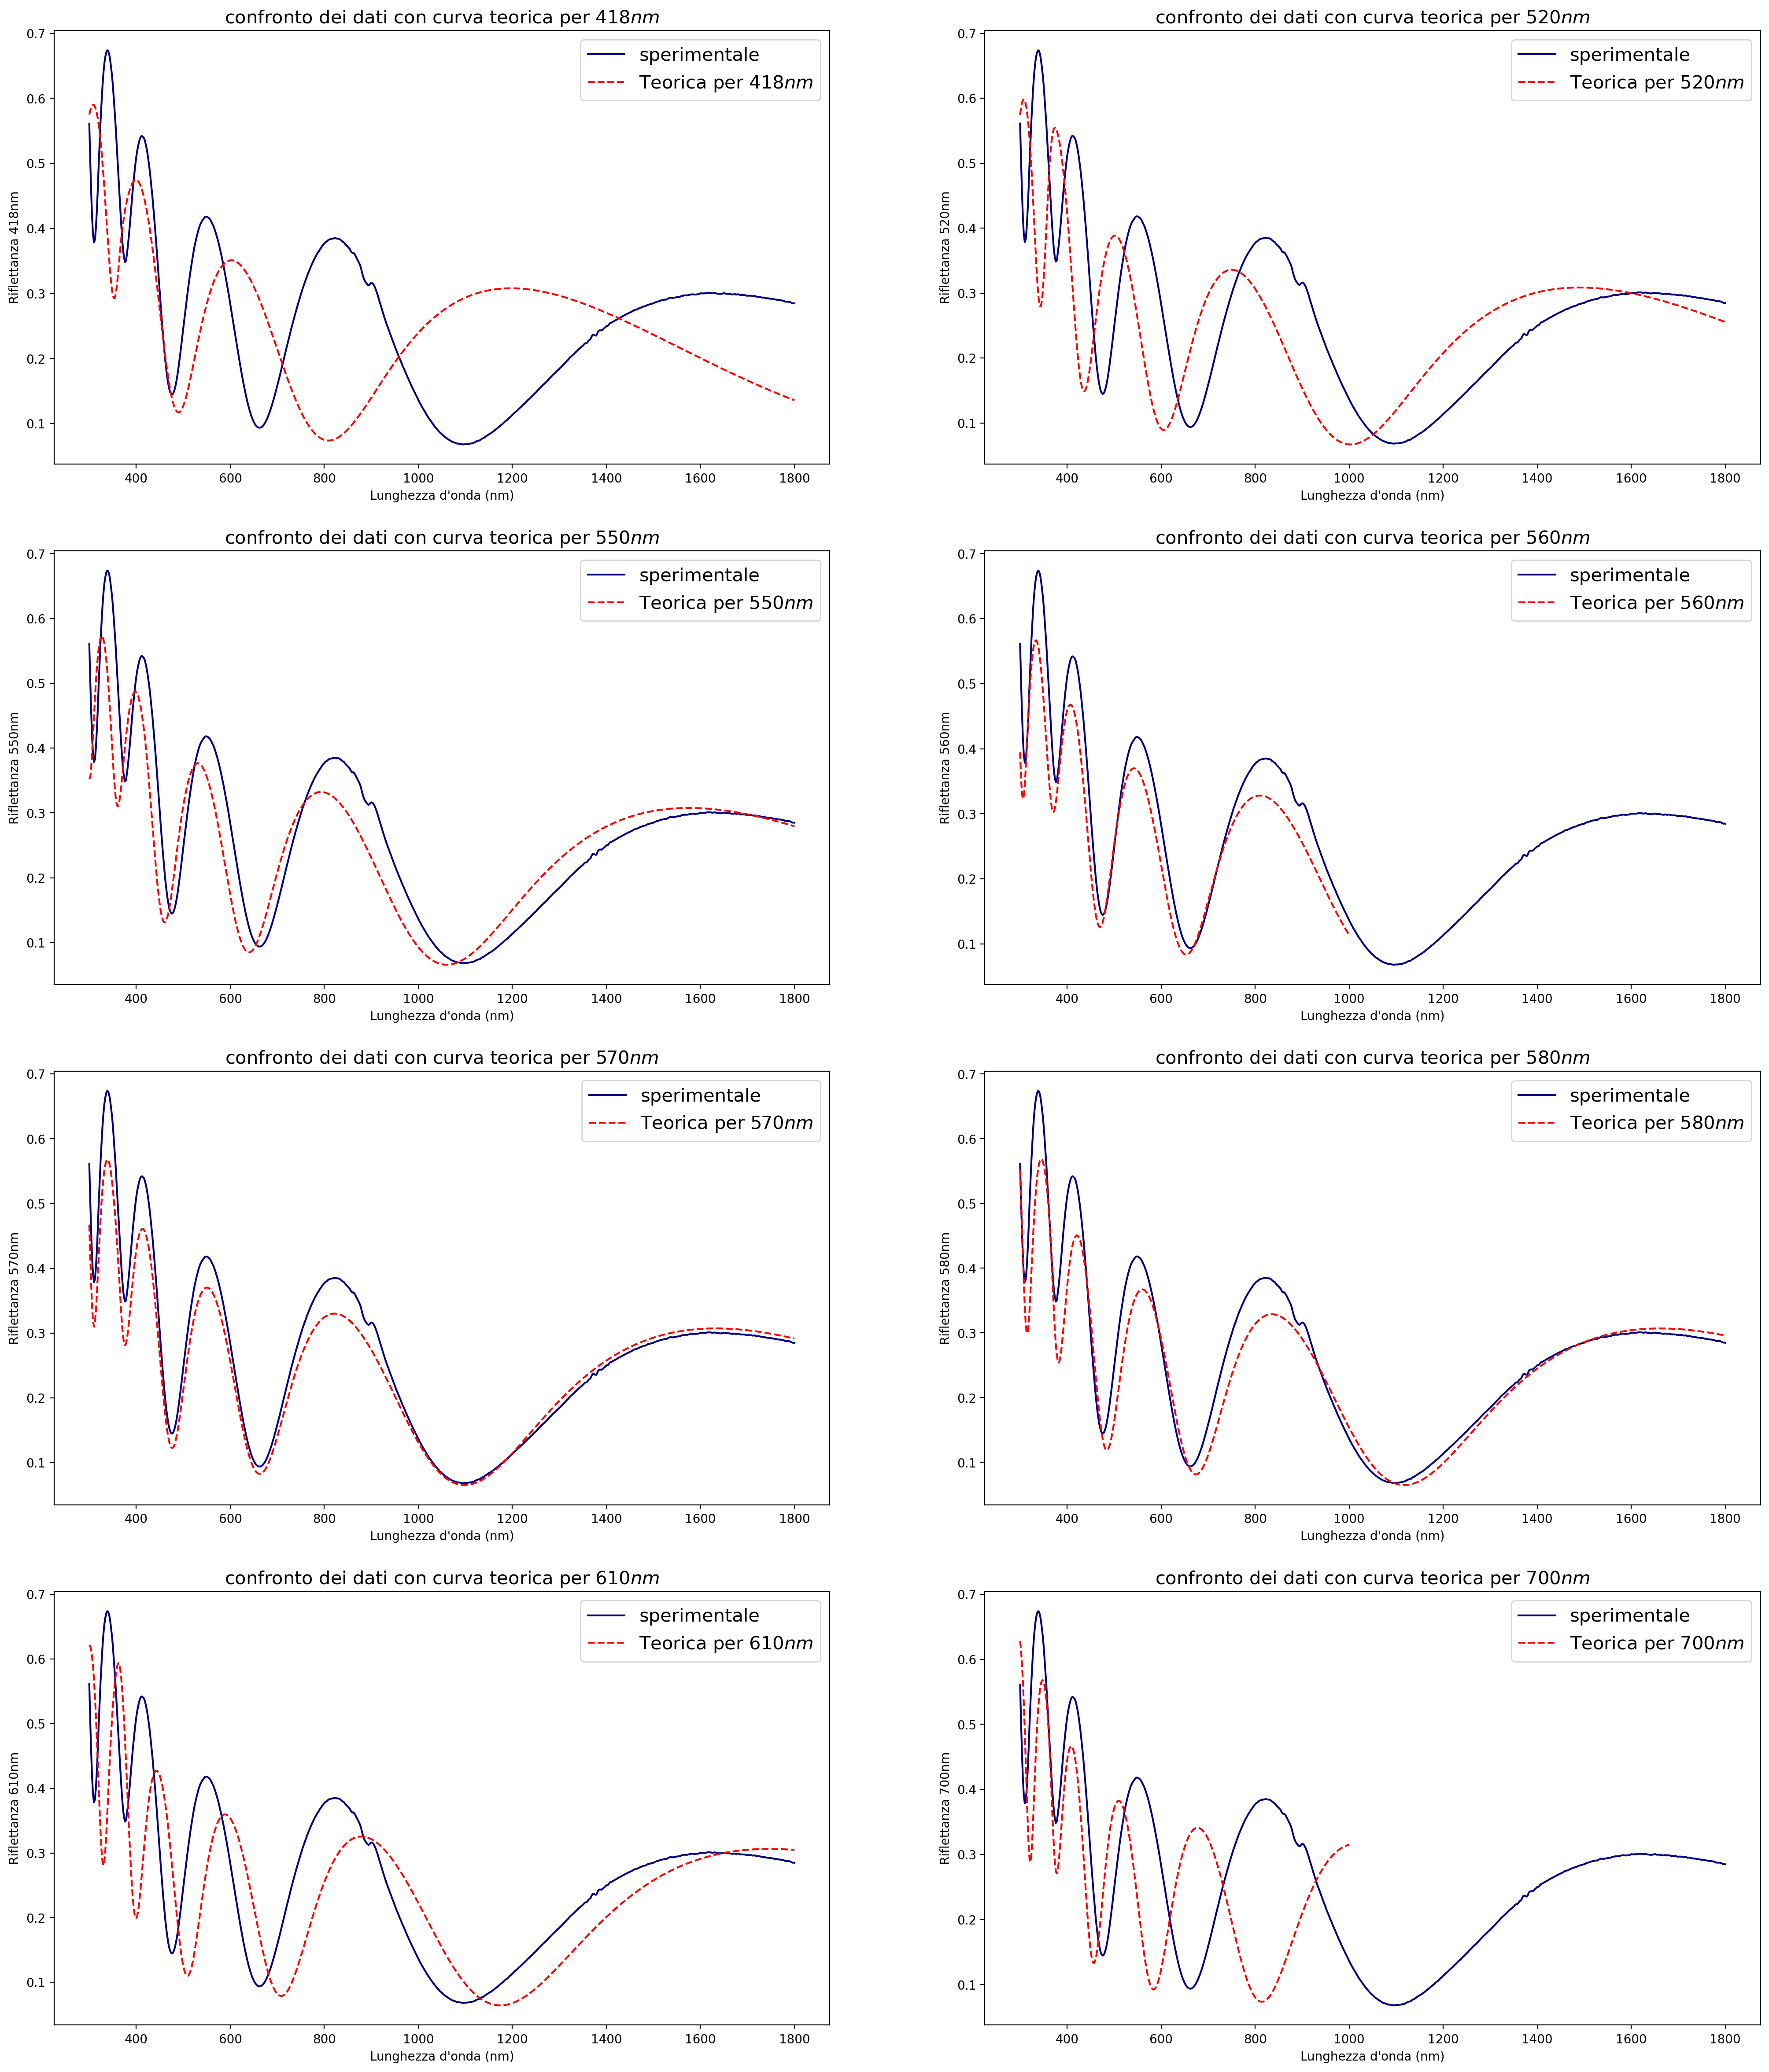

In [101]:
fig, axes = plt.subplots(4,2,figsize = (25,30), dpi = 200)
#plt.figure(figsize = (20,10), dpi = 150)
#plt.plot(x_t_418, y_t_418)
#plt.xticks(fontsize = 17)
#plt.yticks(fontsize = 17)
for l in range(len(lista_lunghezze)):
    stringa = str(lista_lunghezze[l])
    name = "C:/Users/Lorenzo/Desktop/Lab4/" +stringa+ ".txt"
    prova = np.loadtxt(name, skiprows= 1)
    x_p= [prova[i][0] for i in range(len(prova))]
    y_p= [prova[i][1] for i in range(len(prova))]
    j = l%2
    i= l//2
    
    axes[i,j].plot(x_exp,multiplied, label = "sperimentale", color = "navy")
    axes[i,j].plot(x_p, y_p, label = "Teorica per $" +stringa+ "nm$", ls = "--", color = "red")
    axes[i,j].legend(fontsize = 15)
    axes[i,j].set_title("confronto dei dati con curva teorica per $" +stringa+ "nm$", fontsize = 15)
    axes[i,j].set_ylabel("Riflettanza "+stringa+ "nm", fontsize = 10)
    axes[i,j].set_xlabel("Lunghezza d'onda (nm)",fontsize = 10)


In [19]:
def residui(y1,y2):
    somma = 0
    for i in range(len(y1)):
        somma+= (y1[i]-y2[i])**2
    return somma
residui(multiplied,y_p)

16.469787520083777

Dai grafici si evince che il nostro dato sperimentale si avvicina maggiormente alla stima di spessore pari a $570 nm$


In [112]:
nomefile = "C:/Users/Lorenzo/Desktop/Lab4/570.txt"
defi = np.loadtxt(nomefile, skiprows= 1)
x_def= [prova[i][0] for i in range(len(defi))]
y_def= [prova[i][1] for i in range(len(defi))]

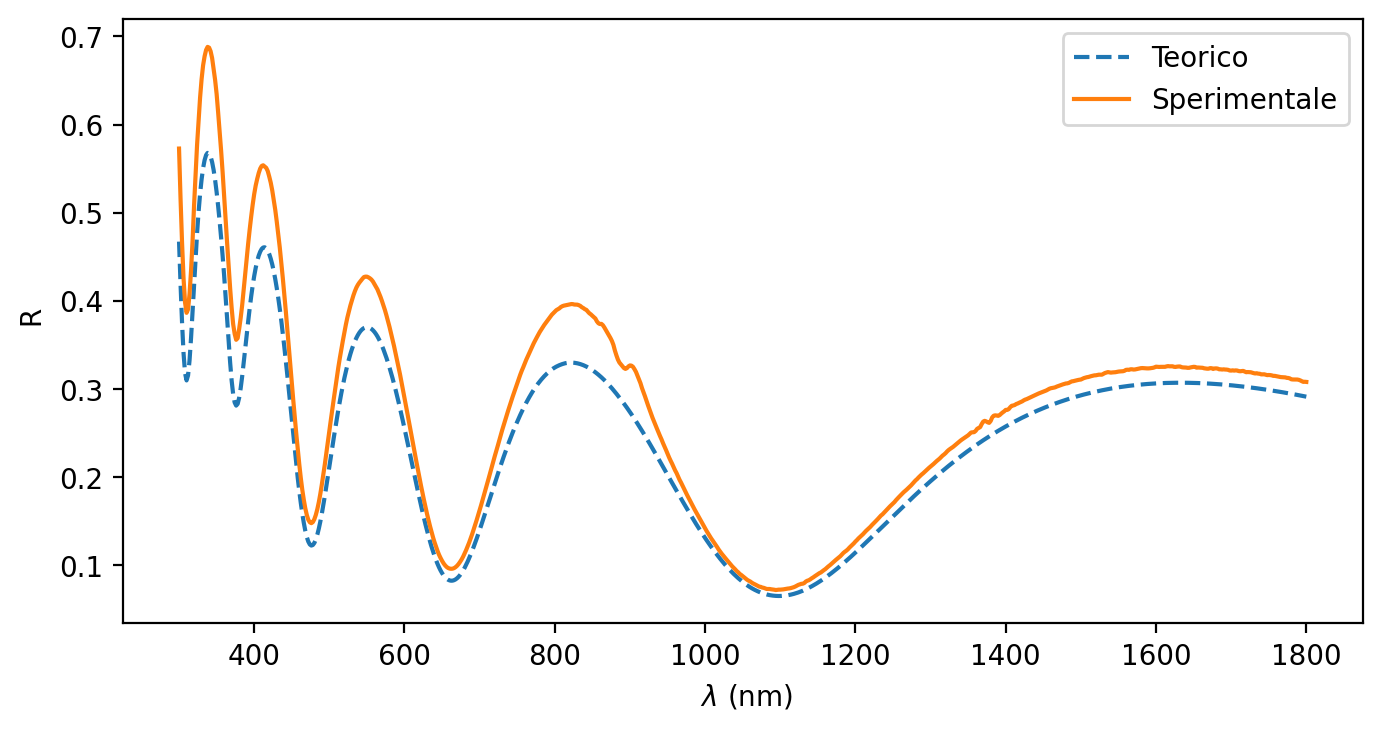

In [115]:
plt.figure(figsize = (8,4), dpi = 200)
plt.xlabel(" $\lambda$ (nm)")
plt.ylabel (" R")
plt.plot(x_def, y_def, label = "Teorico", ls = "--")
plt.plot(x_exp,y_exp, label = "Sperimentale")
plt.legend()
